<a href="https://colab.research.google.com/github/linainsaf/image_audio_processing/blob/main/Audio_signal_Acqisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import wave
from scipy.io import wavfile
import sys
import matplotlib.pyplot as plt
%run quantif.py 
from IPython.display import display, Audio
from scipy import signal



<Figure size 432x288 with 0 Axes>

**I.Étude de la quantification**

1.Charger le signal audio

In [ ]:
signal= wave.open('sine440.wav','r')
params = signal.getparams()  
nchannels, sampwidth, framerate, nframes = params[:4]
str_data  = signal.readframes(nframes)  
signal.close()

x = np.fromstring(str_data,dtype = np.short)# transformer wave data
x=x/2**(15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  import sys


In [ ]:
print("le frequence d'echantillonnage :",framerate,"Hz")
print("le nombre d'echantillonnage :",nframes)

le frequence d'echantillonnage : 44100 Hz
le nombre d'echantillonnage : 44100


(0.0, 0.02)

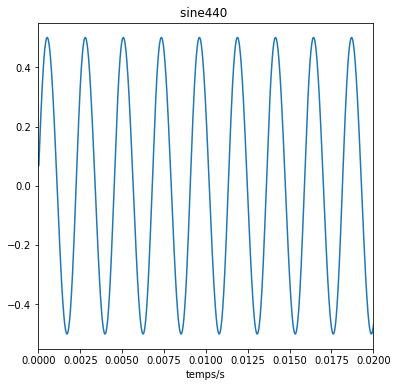

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,nframes)/framerate
plt.plot(t,x)
plt.title("sine440 ")
plt.xlabel("temps/s")
plt.xlim(0,0.02)

2.Quantifier le signal audio

In [ ]:
N=4
A=1
y, q, Q=quantif(x, A, N)
print(y, q, Q)

[ 0.0625  0.0625  0.0625 ... -0.0625 -0.0625  0.0625] 0.125 [8. 8. 8. ... 7. 7. 8.]


(0.0, 0.02)

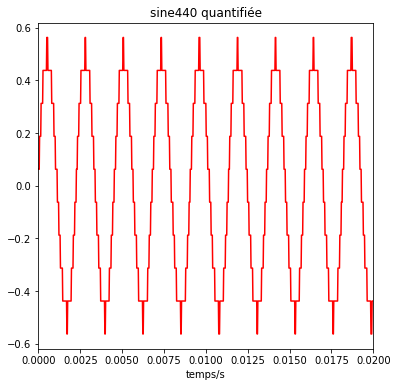

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,nframes)/framerate
plt.plot(t,y,'r')
plt.title("sine440 quantifiée")
plt.xlabel("temps/s")
plt.xlim(0,0.02)

bruit de quantification

$\epsilon_q=x_q-x$

(0.0, 0.02)

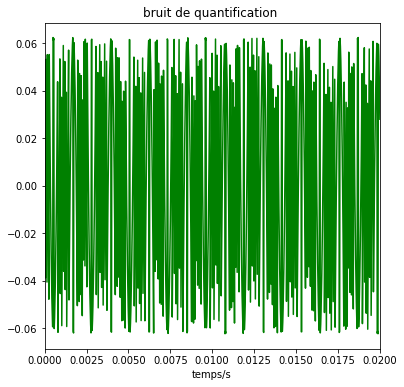

In [ ]:
ep=y-x
plt.figure(figsize=(6,6))
t=np.arange(0,nframes)/framerate
plt.plot(t,ep,'g')
plt.title("bruit de quantification ")
plt.xlabel("temps/s")
plt.xlim(0,0.02)

3.Étudier les propriétés statistiques du bruit quantification

In [ ]:
#la valeur moyenne 
E=np.mean(ep)
print("le valeur moyenne du bruit quantification :",E)
#la variance 
v=np.var(ep)
print("le variance du bruit quantification :",v)
#loi de probabilité uniforme
p=1/q
print("loi de probabilité du bruit quantification :",p)

le valeur moyenne du bruit quantification : 2.763190237032313e-05
le variance du bruit quantification : 0.0015618846949353332
loi de probabilité du bruit quantification : 8.0


le valeur moyenne positive signifique une type d'arrondi par defaut

Comparé avec le resultat au hypothèse en cours (Nous considérrons la valeur moyenne nulle)

$\sigma_q^2=\frac{A^2}{3*2^{2N}}=\frac{1}{3*2^8}=0.001302$< le resultat exprimental=$0.0015618846949353332$

4.l'évolution du RSB pour différent N

In [ ]:
A=1
N=np.arange(0,50)
RSB_db=6*N+np.log10(3)-np.log10(A**2/np.mean(x)**2)

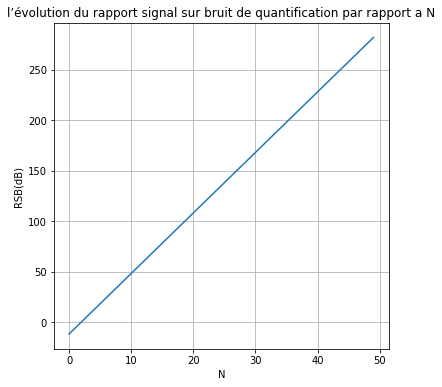

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(N,RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a N")
plt.xlabel("N")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe linéaire proportionnelle.La valeur de RSB(dB) augmente à mesure que N augmente, et le taux d'augementation est constant.

5.l'évolution du RSB pour différent A

In [ ]:
N=8
A=np.arange(10,40,10)
A

array([10, 20, 30])

In [ ]:
y1, q1, Q1=quantif(x, A[0], N)
y2, q2, Q2=quantif(x, A[1], N)
y3, q3, Q3=quantif(x, A[2], N)

(0.0, 0.003)

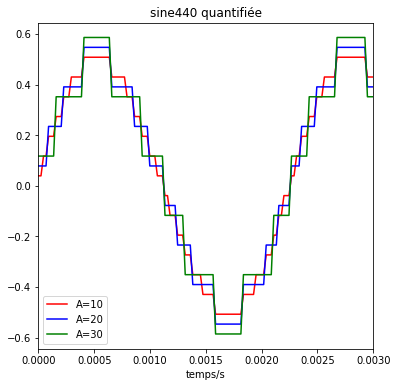

In [ ]:
plt.figure(figsize=(6,6))
t=np.arange(0,nframes)/framerate
plt.plot(t,y1,'r',label='A=10')
plt.plot(t,y2,'b',label='A=20')
plt.plot(t,y3,'g',label='A=30')
plt.title("sine440 quantifiée")
plt.xlabel("temps/s")
plt.legend(loc='best')
plt.xlim(0,0.003)

6.(a)l’évolution du rapport signal sur bruit de quantification en fonction de A

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


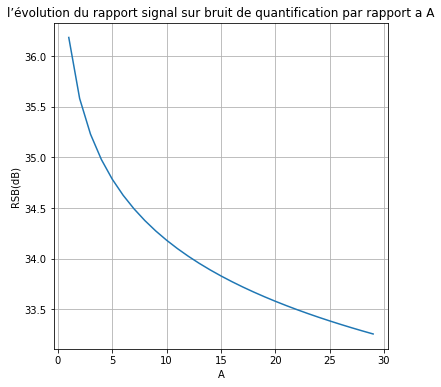

In [ ]:
N=8
A=np.arange(0,30)
RSB_db=6*N+np.log10(3)-np.log10(A**2/np.mean(x)**2)
#en fonction de A
plt.figure(figsize=(6,6))
plt.plot(A,RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a A")
plt.xlabel("A")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe proportionnelle inverse non linéaire. La valeur de RSB diminue à mesure que N augmente et le taux de diminution diminue également.

l’évolution du rapport signal sur bruit de quantification en fonction du facteur de charge en dB

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


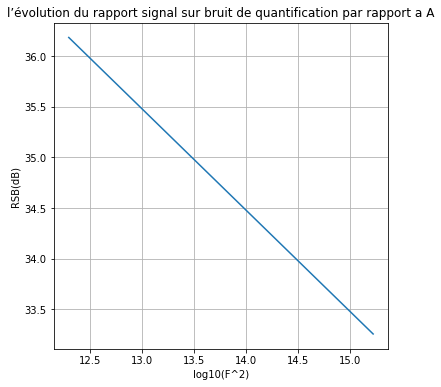

In [ ]:
#en fonction du facteur de charge en dB
F=A/np.mean(x)
plt.figure(figsize=(6,6))
plt.plot(np.log10(F**2),RSB_db)
plt.title("l’évolution du rapport signal sur bruit de quantification par rapport a A")
plt.xlabel("log10(F^2)")
plt.ylabel("RSB(dB)")
plt.grid()

Cette courbe est une courbe linéaire proportionnelle inverse.La valeur de RSB(dB) diminue à mesure que N augmente, et le taux de diminuation est constant.

6.(b)l’évolution du rapport signal sur bruit de quantification en fonction du facteur de charge en dB avec différent N choisi

In [ ]:
N=[5,8,10]
A=np.arange(1,30)
F=A/np.mean(x)

RSB_db1=6*N[0]+np.log10(3)-np.log10(A**2/np.mean(x)**2)
RSB_db2=6*N[1]+np.log10(3)-np.log10(A**2/np.mean(x)**2)
RSB_db3=6*N[2]+np.log10(3)-np.log10(A**2/np.mean(x)**2)

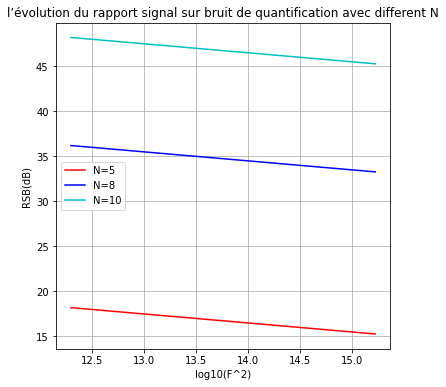

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(np.log10(F**2),RSB_db1,'r',label='N=5')
plt.plot(np.log10(F**2),RSB_db2,'b',label='N=8')
plt.plot(np.log10(F**2),RSB_db3,'c',label='N=10')
plt.title("l’évolution du rapport signal sur bruit de quantification avec different N")
plt.xlabel("log10(F^2)")
plt.ylabel("RSB(dB)")
plt.legend(loc='best')
plt.grid()

En choisissant différentes valeurs de N, nous obtenons trois courbes proportionnelles inverses linéaires parallèles. Cependant, plus la valeur de N est élevée, plus la valeur moyenne de la courbe est grande.

6.（c)Avec une pleine échelle trop faible 

Si la valeur de A est petite, alors A compensera l'effet de la variance x sur le facteur de charge

7.

In [ ]:
#ipd.Audio('voice.wav')#signal original
display(Audio('voice.wav'))

In [ ]:
signal2= wave.open('voice.wav','r')
params2 = signal2.getparams() 
nchannels2, sampwidth2, framerate2, nframes2 = params2[:4]
str_data2 = signal2.readframes(nframes2) 
signal2.close()
x2 = np.fromstring(str_data2,dtype = np.short)# transformer wave data

A=5
N=10
y2, q, Q=quantif(x2, A, N)
display(Audio(y2,rate=framerate2)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


### 1.2 Rééchantillonnage et repliement spectral

1.2.1 Rythmique

In [ ]:
fe,xr=wavfile.read('rythmique.wav')
xr=xr/(2**15)
Ne=(len(xr))
voice1=[]
np.shape(xr)
for i in xr:
  voice1.append(i[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'temps/s')

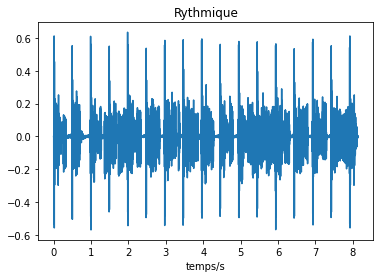

In [ ]:
t=np.arange(0,Ne)/fe
plt.plot(t,voice1)
plt.title("Rythmique")
plt.xlabel("temps/s")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


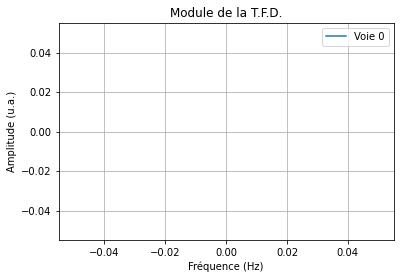

In [ ]:
# Tracer du module du spectre de la TFD du signal temporel
f=np.arange(0,fe,fe/Ne)
voice1f=np.fft.fft(20*np.log10(voice1))
voice1f_module=np.fft.fftshift(np.abs(voice1f.real/fe))
plt.plot(f,voice1f_module, label="Voie 0")
plt.title('Module de la T.F.D.')
plt.legend()
plt.grid(True)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (u.a.)')
Fsmin=24400*2

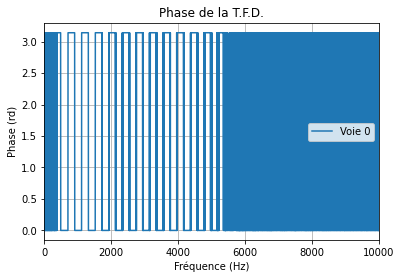

In [ ]:
# Tracer de la phase du spectre du signal temporel
voice1f_phase=np.fft.fftshift(np.angle((np.fft.fft(voice1)).real))
plt.plot(np.fft.fftshift(freq),voice1f_phase, label="Voie 0")
plt.xlim(0,10000)
plt.title('Phase de la T.F.D.')
plt.legend()
plt.grid(True)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (rd)')
plt.show()
